# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [2]:
from commonfunctions import *
import math
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
'''read image and gray scale and noise'''
def doNoise (img_gray):
    noise_img = random_noise(img_gray,mode = 's&p',amount = 0.05)
    return noise_img

In [13]:
img_gray = io.imread('pout.tif')
print(img_gray)
noise_img=doNoise(img_gray)

[[107 108 107 ...  84  83  83]
 [109 106 108 ...  84  84  86]
 [107 106 110 ...  84  83  83]
 ...
 [ 97  99 101 ...  82  82  83]
 [ 99  98  98 ...  84  84  86]
 [101  99  99 ...  97  97  97]]


In [20]:
'''
(1) Your own median filter algorithm
'''
def medianfilter(img,size):
    img=(img*255).astype(np.uint8)
    bd = int(size / 2)
    # copy image size
#     median_img = np.zeros((img.shape[0],img.shape[1]))
    median_img =img.copy()
    for i in range(bd, img.shape[0] - bd):
        for j in range(bd, img.shape[1] - bd):
            kernel =img[i - bd : i + bd + 1, j - bd : j + bd + 1]
            
            med=int(np.median(kernel))
            median_img[i, j] = med
    return median_img

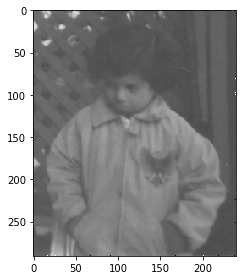

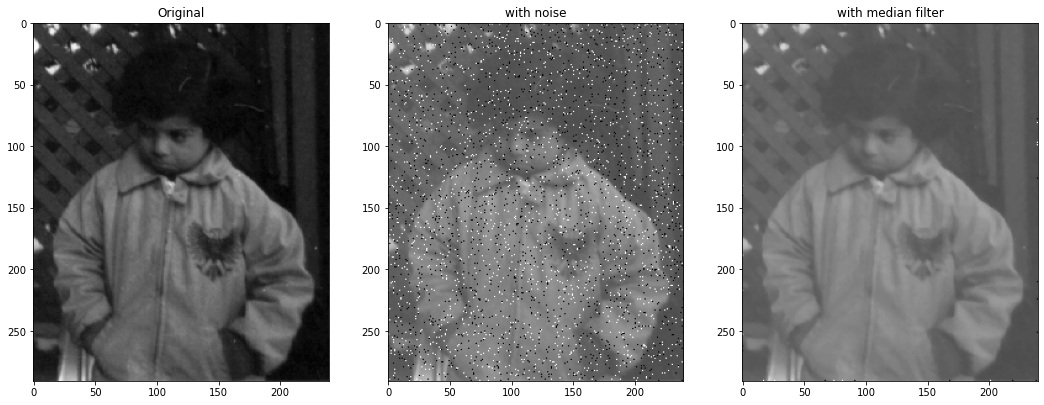

In [44]:
io.imshow(smooth_img_own)
smooth_img_own= medianfilter(noise_img,3)
show_images([img_gray,noise_img,smooth_img_own],['Original','with noise','with median filter'])

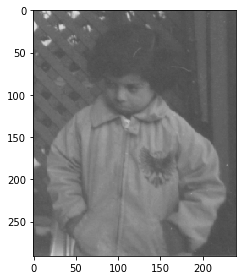

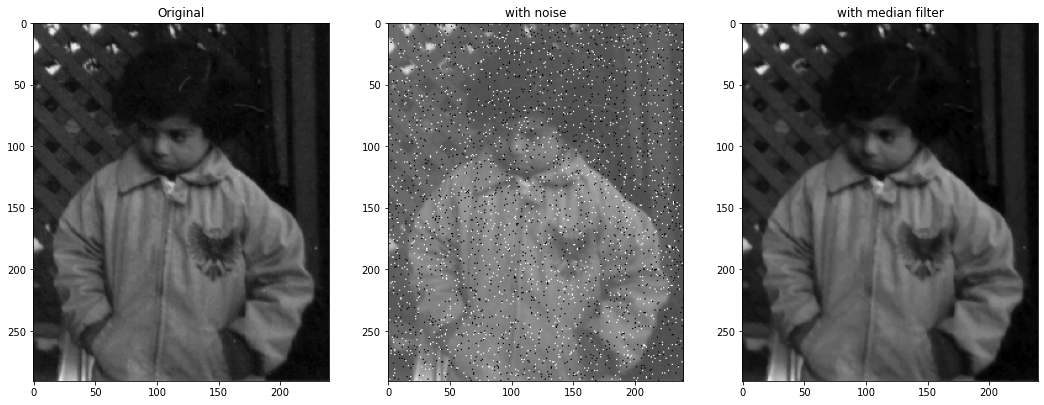

In [42]:
'''
(2) skimage median filter
'''
io.imshow(img_gray)
smooth_img= median(noise_img)
show_images([img_gray,noise_img,smooth_img],['Original','with noise','with median filter'])

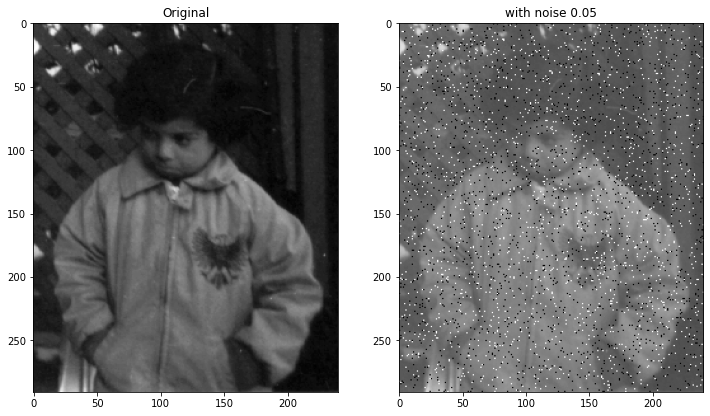

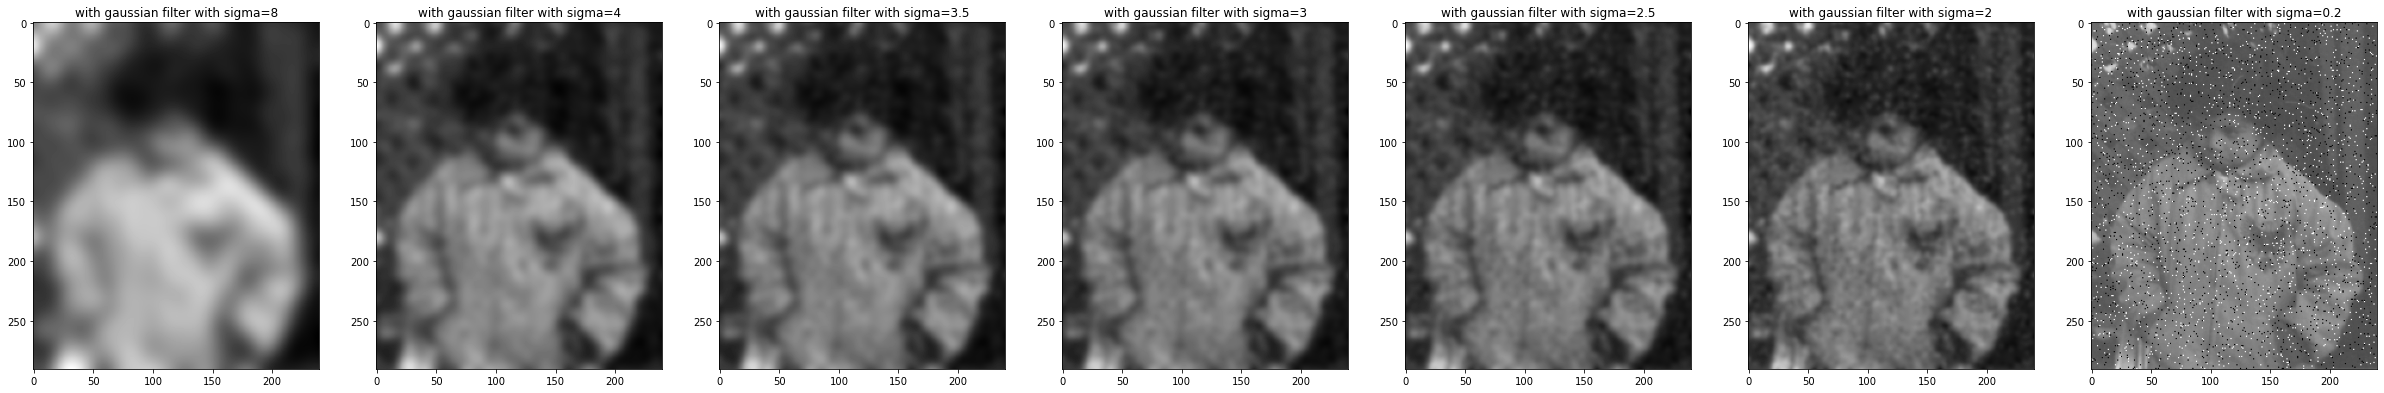

In [22]:
'''
(3) Gaussion Filters
'''
def gausFilter(img,sigma):
    smooth_img= gaussian(img,sigma)
    return smooth_img
#     show_images([smooth_img],['with gaussian filter with sigma='+ str(sigma)])
show_images([img_gray,noise_img],['Original','with noise 0.05'])
show_images([gausFilter(noise_img,8),
gausFilter(noise_img,4),
gausFilter(noise_img,3.5),
gausFilter(noise_img,3),
gausFilter(noise_img,2.5),
gausFilter(noise_img,2),
gausFilter(noise_img,0.2)],['with gaussian filter with sigma='+ str(8),
                            'with gaussian filter with sigma='+ str(4),
                            'with gaussian filter with sigma='+ str(3.5),
                            'with gaussian filter with sigma='+ str(3),
                           'with gaussian filter with sigma='+ str(2.5),
                            'with gaussian filter with sigma='+ str(2),
                            'with gaussian filter with sigma='+ str(0.2)
                           ])

Can't find the perfect sigma for some reasons :
1-Gausian filter not work perfectly with impulsive noise
2- there tradeoff bettween edges preservation and imulate noise 
so choose of perfect image depend on using of this image